In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

In [3]:
# загрузим данные
df = pd.read_csv('data/pokemon.zip')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


## k-means кластеризация

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

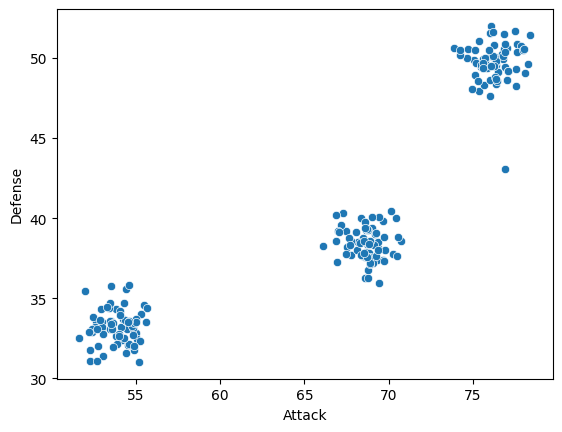

In [4]:
# попробуем кластеризовать покемонов по их силе атаки и защиты
# для этого сохраним в матрицу X 2 интересующих признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

Теперь инициализируем алгоритм k-means. Для этого зададим:  
    - n_clusters - количество кластеров  
    - init - стратегию кластеризации  
    - n_init - количество запусков алгоритма k-means  
    - random_state - для того, чтобы результаты от запуска к запуску воспроизводились  

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

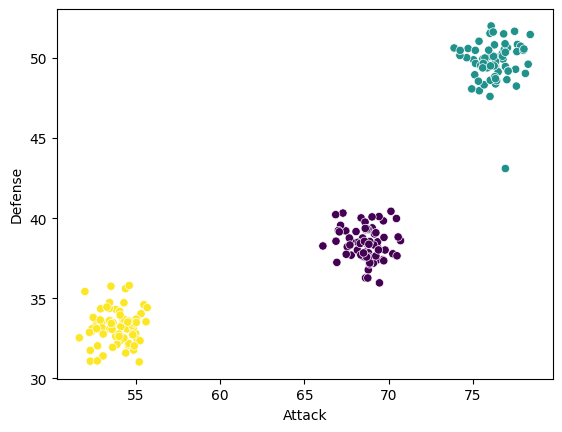

In [6]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

Вроде неплохо, но давайте посмотрим, может если увеличить количество кластеров станет лучше

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

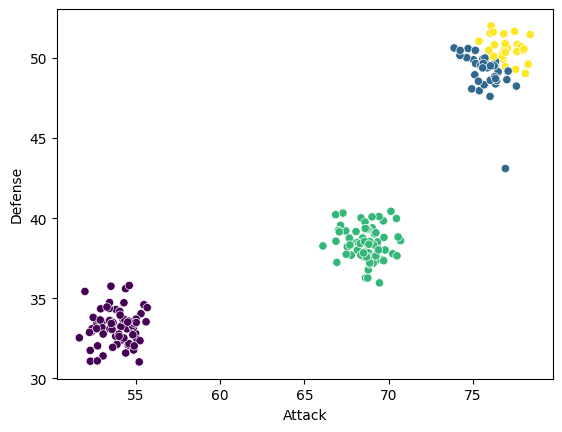

In [7]:
# инициализируем алгоритм k-means, с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

Вроде неплохо, но явно есть точки, которые находятся вдалеке от основных кластеров. Например, 2 фиолетовые точки 

In [8]:
# добавляем третий признак - скорость покемона, а алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]

# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3_2d'] = predictions

## Выбор количества кластеров с помощью метода локтя

/home/alexey/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alexey/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alexey/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alexey/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alexey/anaconda3/l

<AxesSubplot: xlabel='cluster', ylabel='inertia'>

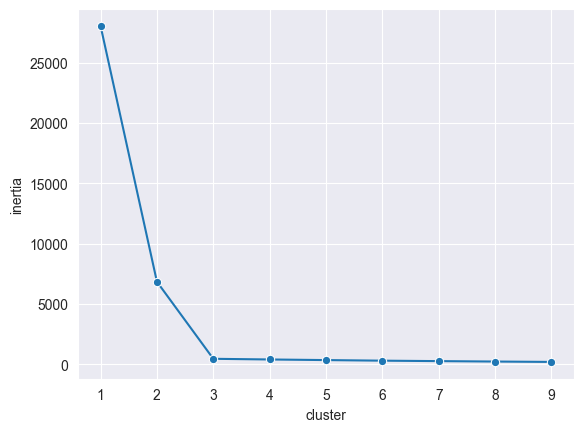

In [9]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, X))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

## Выбор количества кластеров с помощью коэффициент силуэта

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

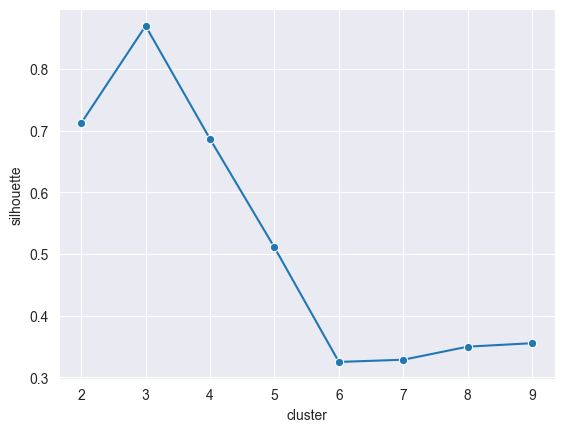

In [10]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    # sourcery skip: inline-immediately-returned-variable
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

### Задание 2.7
1 point possible (graded)
Вам как специалисту по анализу данных поступили <a href="https://lms.skillfactory.ru/assets/courseware/v1/89b083afa0b2aa24e00b10aaa523fbce/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/values_from_the_instrument.zip">показания с прибора</a>, измеряющего количество нитратов и пестицидов в разных фруктах и овощах.

Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.

Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

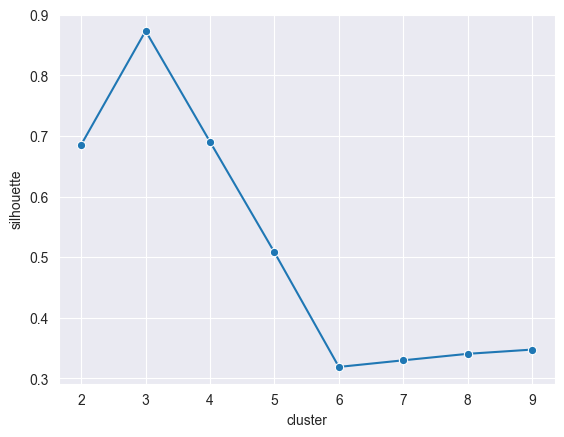

In [12]:
data = pd.read_csv('data/values_from_the_instrument.zip')

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные
X = data[['x1', 'x2']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")


## Метрики

In [14]:
# импортируем подсчет метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию к какому кластеру относятся объекты датасета и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

print(homogeneity_score(labels_true=[1, 1, 0, 0], labels_pred=[1, 1, 0, 0]))

1.0
1.0


### Задание 3.3
1 point possible (graded)
Для пяти объектов вы провели кластеризацию k-means. Известно, что объекты должны относиться к следующим кластерам: 1, 2, 2, 1, 0. В ходе работы алгоритма вы получили следующие предсказания для каждого элемента: 1, 0, 2, 1, 2.

Рассчитайте метрику однородности полученных кластеров. Введите полученное значение, округлив его до второго знака после точки-разделителя.

In [17]:
print(
    f'homogeneity_score={homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]):.2f}')


homogeneity_score=0.74


In [18]:
# теперь посчитаем насколько однородными получились кластеры с покемонами
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


In [19]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаем предсказанную информацию к какому кластеру относятся объекты датасета и правильные ответы, подсчитываем метрику
print(completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))


1.0


In [20]:
# посчитаем насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

# посчитаем насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.829867483307009


In [21]:
# импортируем из библиотеки sklearn подсчет v-меры
from sklearn.metrics import v_measure_score


# теперь посчитаем v-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9070246789753754


In [22]:
# импортируем из библиотеки sklearn подсчет индекса Рэнда
from sklearn.metrics.cluster import rand_score

# теперь посчитаем насколько полными получились кластеры с покемонами
print(rand_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(rand_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.94643618280843


## Юнит 2. Другие методы кластеризации

In [23]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering


# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)

# обучаем модель
agglomerative_clustering.fit(X)

# получаем метки c информацией, к какому кластеру относятся объекты
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,

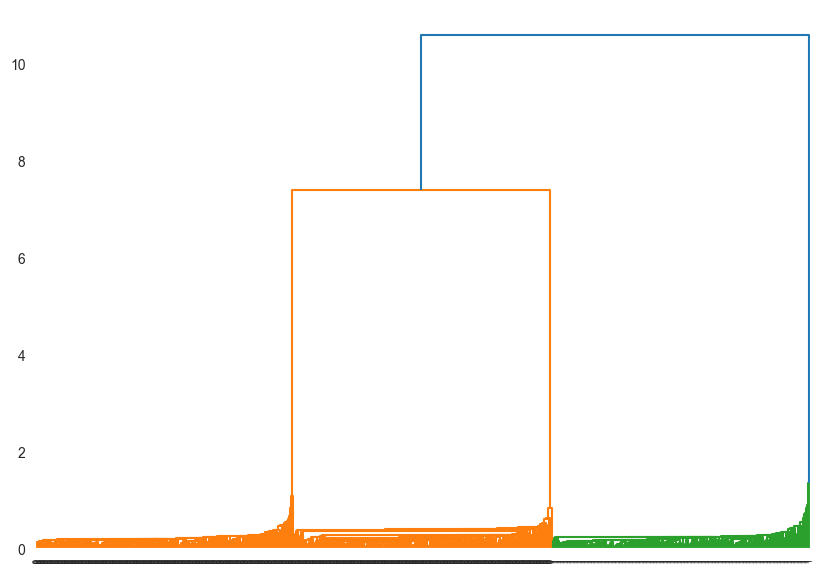

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')


plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=agglomerative_clustering.labels_,
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

## GMM кластеризация

In [32]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture


# загрузим данные
df = pd.read_csv('data/pokemon.zip')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df.head()

X = df[['Attack', 'Defense']]

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

In [33]:
X.shape

(206, 2)

In [34]:
gm_prediction.shape

(206,)

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

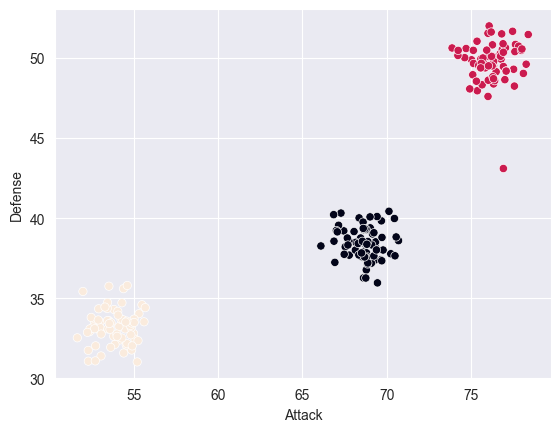

In [35]:
# sns.set_style("white")
sns.scatterplot(x=df.Attack, y=df.Defense, c=gm_prediction)

#### Задание 5.4
1 point possible (graded)

Скачайте <a hfer="https://lms.skillfactory.ru/assets/courseware/v1/c5ffc8e0c422b2cd1ed3e2ec0b50a7b8/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/housing.zip">датасет</a>, в котором представлены цены на однокомнатные квартиры и возраст этих квартир. Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?

In [36]:
data = pd.read_csv('data/housing.zip')
data.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


<AxesSubplot: xlabel='year', ylabel='price'>

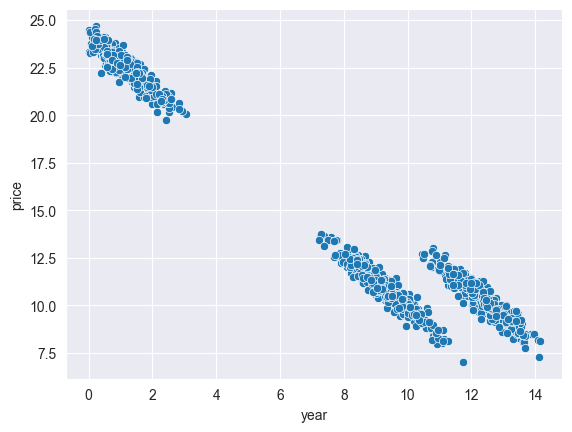

In [39]:
sns.scatterplot(x=data.year, y=data.price)

<AxesSubplot: xlabel='year', ylabel='price'>

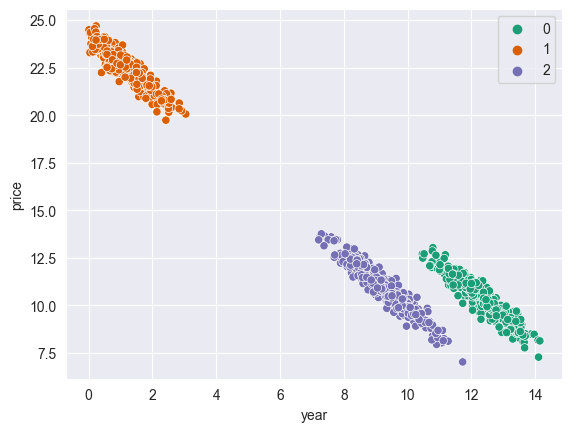

In [54]:
gmc = GaussianMixture(n_components=3, random_state=42)
X_houses = data[['year', 'price']]
gmc.fit(X_houses)
gmc_preds = gmc.predict(X_houses)

sns.scatterplot(x=data.year, y=data.price, hue=gmc_preds, palette='Dark2')

## Спектральная кластеризация

In [55]:
df

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1
...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1


In [56]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию 
spectral_clustering = SpectralClustering(n_clusters=4, n_init=1500, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

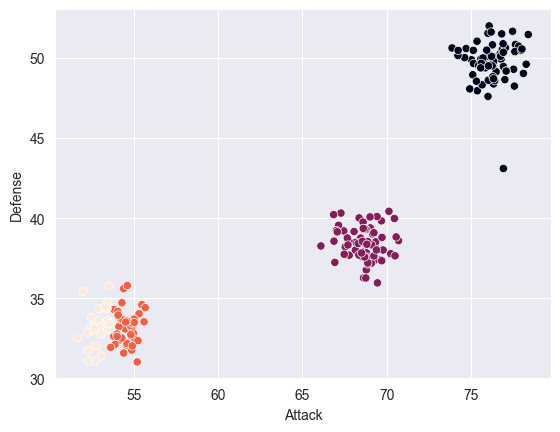

In [57]:
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

## DBSCAN

In [58]:
df

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1
...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1


<AxesSubplot: xlabel='Attack', ylabel='Defense'>

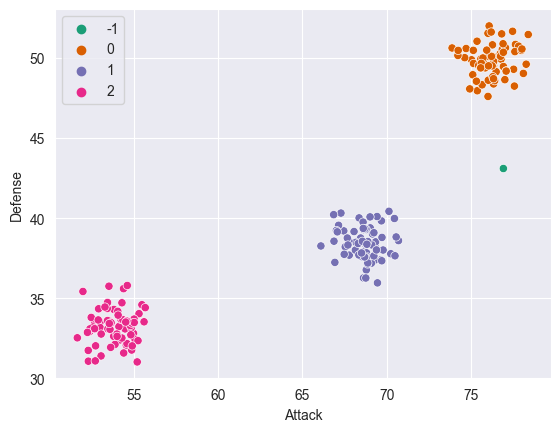

In [62]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, hue=clustering.labels_, palette='Dark2')

### Задание 7.5
1 point possible (graded)

Для <a href="https://lms.skillfactory.ru/assets/courseware/v1/c5ffc8e0c422b2cd1ed3e2ec0b50a7b8/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/housing.zip">датасета с ценами квартир</a> проведите кластеризацию DBSCAN с параметрами по умолчанию. Визуализируйте результаты. Сколько точек было размечено как выбросы?

<AxesSubplot: xlabel='year', ylabel='price'>

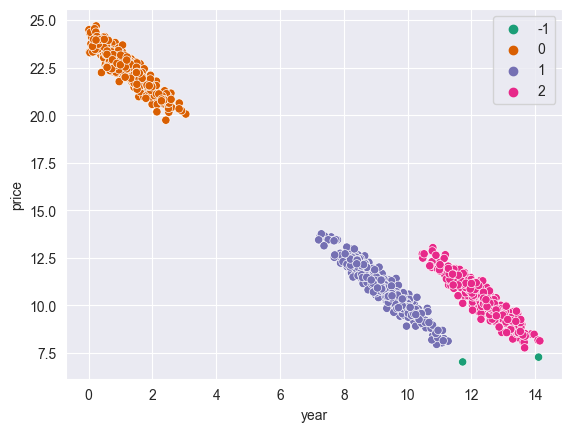

In [63]:
dbscan = DBSCAN()
dbscan.fit(X_houses)
sns.scatterplot(x=X_houses['year'], y=X_houses['price'], hue=dbscan.labels_, palette='Dark2')

### Задание 7.6
1 point possible (graded)

В предыдущем задании алгоритм DBSCAN ошибочно определил точку у жёлтого кластера как выброс. Так произошло потому, что алгоритм запускался с параметрами по умолчанию.

Какие значения параметров eps и min_samples подойдут для верной кластеризации данных?

* A eps = 0.5, min_samples = 5
* B eps = 0.7, min_samples = 6
* C eps = 0.7, min_samples = 5
* D eps = 1.15, min_samples = 2

<AxesSubplot: xlabel='year', ylabel='price'>

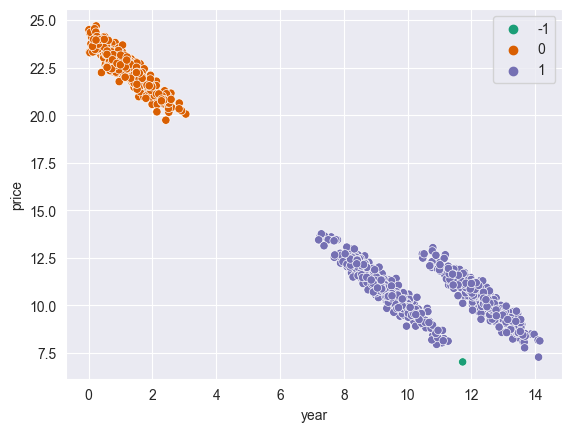

In [67]:
dbscan = DBSCAN(eps=1.15, min_samples=2)
dbscan.fit(X_houses)
sns.scatterplot(x=X_houses['year'], y=X_houses['price'], hue=dbscan.labels_, palette='Dark2')